In [1]:
from IPython.display import display, Markdown, Latex

from product import Option
from strategy import *
from euronext import Page, Ticker
from graph import Graph

g=Graph(4800, 5200, 25)
p = Page(ticker=Ticker.CAC5PX, params='Class_type=0&Class_symbol=&Class_exchange=&ex=&ps=999&md=11-2018')
p.fetch()
(call, put) = p.scrap_options(multiplier=10)


In [3]:
g=Graph(4800, 5200, 25, [4880, 5075])

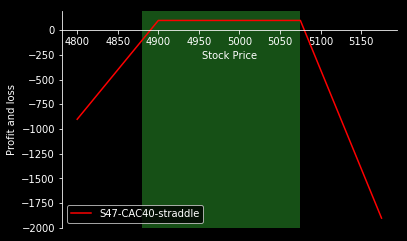

Category,strike,direction,Quantity,Cost,Premium
Put,4900,short,1,-50,-5
Call,5075,short,2,-48,-2.4


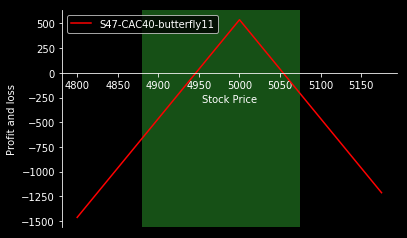

Category,strike,direction,Quantity,Cost,Premium
Put,5000,short,1,-333,-33.3
Call,5000,short,1,-204,-20.4


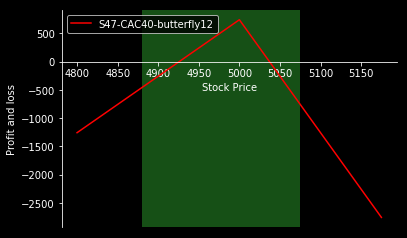

Category,strike,direction,Quantity,Cost,Premium
Put,5000,short,1,-333,-33.3
Call,5000,short,2,-408,-20.4


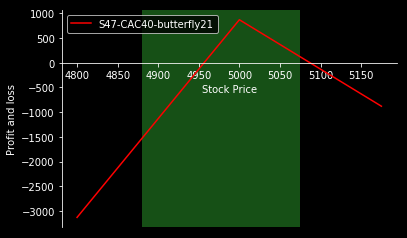

Category,strike,direction,Quantity,Cost,Premium
Put,5000,short,2,-666,-33.3
Call,5000,short,1,-204,-20.4


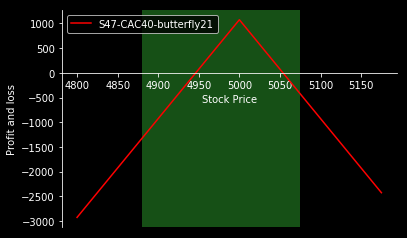

Category,strike,direction,Quantity,Cost,Premium
Put,5000,short,2,-666,-33.3
Call,5000,short,2,-408,-20.4


1074.0

In [4]:
# g.display_page_raw(p)
#g.profit(put[4900], 'short')
#g.profit(call[5075], 'short')
s = Strategy('S47-CAC40-straddle').add(put[4900], 'short', 1).add(call[5075], 'short', 2)
g.profit(s, 'long')
g.display_summary(s)
max(s.payoff(g.sT, 'long'))

b11 = Strategy('S47-CAC40-butterfly11').add(put[5000], 'short', 1).add(call[5000], 'short', 1)
b12 = Strategy('S47-CAC40-butterfly12').add(put[5000], 'short', 1).add(call[5000], 'short', 2)
b21 = Strategy('S47-CAC40-butterfly21').add(put[5000], 'short', 2).add(call[5000], 'short', 1)
b22 = Strategy('S47-CAC40-butterfly21').add(put[5000], 'short', 2).add(call[5000], 'short', 2)
g.profit(b11, 'long')
g.display_summary(b11)
max(b11.payoff(g.sT, 'long'))
g.profit(b12, 'long')
g.display_summary(b12)
max(b12.payoff(g.sT, 'long'))
g.profit(b21, 'long')
g.display_summary(b21)
max(b21.payoff(g.sT, 'long'))
g.profit(b22, 'long')
g.display_summary(b22)
max(b22.payoff(g.sT, 'long'))

In [ ]:
bspread = BoxSpread(call[5000], call[4950], put[5100], put[5150])
g.profit_strategy(bspread)
print('Cost-BoxSpread : {:0.02f}€'.format(bspread.cost()))
g.display_summary(bspread)

In [ ]:
g.profit_rainbow(put.values(), 'short', title='Call Rainbow')

In [ ]:
from analyse import pivot_sr

H = 5140.45
B = 4986.19
C = 5025.20
for k, v in pivot_sr(H, B, C).items():
    print('{} {}'.format(k,v))

### Semaine 46 : 19 nov au 23 nov
- 1 $\sigma$ [4875 - 5175]
- 2 $\sigma$ [4750 - 5300]
- Pivot 5050
- SR1 [4960 - 5115]
- SR2 [4896 - 5204]
- SR3 [4806 - 5269]

In [ ]:
bss = BoxSpread.explorator(call.values(), put.values(), spread=200, gap=150)
g.profit_rainbow(bss, 'long', title='BoxSpread Rainbow')

In [ ]:
bss = BoxSpread.explorator(call.values(), put.values(), spread=50, gap=100)
g.profit_rainbow(bss, 'long', title='BoxSpread Rainbow')